# ML : K Nearest Neighbours

AirBnB strategy:

* find a few listings that are similar to ours,
* average the listed price for the ones most similar to ours,
* set our listing price to this calculated average price.

Similarity Metric 
* comparing numerical features ( observations) 
* predicit a continous value , Euclidean Distance



$ d = \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2 + ... + (q_n - p_n)^2} $


</br>


<img src="img/euclidean_distance_five_features.png">

### Univariate KNN

$ d = \sqrt{(q_1 - p_1})^2 $

<br>
$ d = |q_1 - p_1| $

In [1]:
import pandas as pd

In [2]:
dc_listings = pd.read_csv('dc_airbnb.csv')

In [3]:
print(dc_listings)

     host_response_rate host_acceptance_rate  host_listings_count  \
0                   92%                  91%                   26   
1                   90%                 100%                    1   
2                   90%                 100%                    2   
3                  100%                  NaN                    1   
4                   92%                  67%                    1   
...                 ...                  ...                  ...   
3718               100%                  60%                    1   
3719               100%                  50%                    1   
3720               100%                 100%                    2   
3721                88%                 100%                    1   
3722                70%                 100%                    1   

      accommodates        room_type  bedrooms  bathrooms  beds    price  \
0                4  Entire home/apt       1.0        1.0   2.0  $160.00   
1                6  E

In [4]:
import numpy as np

In [5]:
our_living_space = 3
first_living_space_value = dc_listings['accommodates'][0]
first_distance = np.abs(our_living_space - first_living_space_value)
print(first_distance) # The closer to 0 the distance the more similar the living spaces are.

1


we can rank the existing living spaces by ascending distance values, the proxy for similarity.

In [6]:
dc_listings['distance'] = np.abs(dc_listings['accommodates'] - our_living_space)

dc_listings['distance'].value_counts()

1     2294
2      503
0      461
3      279
5       73
4       35
7       22
6       17
9       12
13       8
8        7
12       6
11       4
10       2
Name: distance, dtype: int64

In [7]:
np.random.seed(1)
dc_listings[dc_listings['distance']==0]['accommodates']

26      3
34      3
36      3
40      3
44      3
       ..
3675    3
3697    3
3707    3
3714    3
3722    3
Name: accommodates, Length: 461, dtype: int64

In [8]:
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]


In [9]:
dc_listings = dc_listings.sort_values(by='distance')

In [10]:
dc_listings.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state,distance
577,98%,52%,49,3,Private room,1.0,1.0,2.0,$185.00,NaN,NaN,2,14,1,38.908356,-77.028146,Washington,20005,DC,0
2166,100%,89%,2,3,Entire home/apt,1.0,1.0,1.0,$180.00,NaN,$100.00,1,14,10,38.905808,-77.000012,Washington,20002,DC,0
3631,98%,52%,49,3,Entire home/apt,1.0,1.0,2.0,$175.00,NaN,NaN,3,14,1,38.889065,-76.993576,Washington,20003,DC,0
71,100%,94%,1,3,Entire home/apt,1.0,1.0,1.0,$128.00,$40.00,NaN,1,1125,9,38.879960,-77.006491,Washington,20003,DC,0
1011,NaN,NaN,1,3,Entire home/apt,0.0,1.0,1.0,$115.00,NaN,NaN,1,1125,0,38.907382,-77.035075,Washington,20005,DC,0


In [11]:
dc_listings['price'].head(10)

577     $185.00
2166    $180.00
3631    $175.00
71      $128.00
1011    $115.00
380     $219.00
943     $125.00
3107    $250.00
1499     $94.00
625     $150.00
Name: price, dtype: object

In [12]:
 dc_listings['price'] = dc_listings['price'].str.replace('$','').str.replace(',','').astype('float')

In [13]:
mean_price = dc_listings['price'][:5].mean()
mean_price

156.6

In [14]:
def predict_price(new_listing):
    temp_df = dc_listings.copy()
    temp_df['distance'] = np.abs(temp_df['accommodates'] - new_listing)
    temp_df = temp_df.sort_values(by='distance')
    return temp_df['price'][:5].mean()

In [15]:
predict_price(1)

78.8

In [16]:
predict_price(2)

126.0

In [17]:
predict_price(3)

194.8

---

Evaluating Model Performace



In [18]:
dc_listings = pd.read_csv("dc_airbnb.csv")
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

In [19]:
train_df = dc_listings.iloc[0:2792]
test_df = dc_listings.iloc[2792:]

In [20]:

def predict_price(new_listing):
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbor_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbor_prices.mean()
    return(predicted_price)

test_df['predicted_price'] = test_df['accommodates'].apply(predict_price)

C:\Users\Dan\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Error metric

* quantifies how good the predictions on test set 
* error metric quantifies how inaccurate our predictions were from the actual values
* low error metric means that the gap between the predicted list price and actual list price values is low while a high error metric means the gap is high.


mean absolute error

$MAE$ = $\frac{1}{n} \sum_{k=1}^n |(actual_1 - predicted_1)| + ... + |(actual_n - predicted_n)|$



In [21]:
mae = np.sum(np.abs(test_df['predicted_price'] - test_df['price']))/len(test_df)
mae

56.29001074113856

mean squared error

$mse = \frac{1}{n} \sum_{k=1}^n (actual_1 - predicted_1)^2 + ... +(actual_n - predicted_n)^2$

In [22]:
mse = np.sum((test_df['price'] - test_df['predicted_price'])**2)/len(test_df)
mse

18646.525370569278

In [23]:
train_df = dc_listings.iloc[0:2792]
test_df = dc_listings.iloc[2792:]

def predict_price(new_listing):
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['bathrooms'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbors_prices.mean()
    return(predicted_price)

test_df['predicted_price'] = test_df['bathrooms'].apply(predict_price)

test_df['squared_error']  = (test_df['price'] - test_df['predicted_price'])**2


mse = test_df['squared_error'].mean()

print(mse)


18405.44408163265


C:\Users\Dan\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\Dan\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Root mean squared error 

* error metric whose units are the base unit


$ RMSE = \sqrt{MSE}$

In [24]:
np.sqrt(mse)

135.66666532952246

In [25]:
errors_one = pd.Series([5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10])
errors_two = pd.Series([5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 1000])

In [31]:
mae_one = np.mean(errors_one)
mse_one = np.mean(np.square(errors_one))
rmse_one = np.sqrt(mse_one)


mae_two = np.mean(errors_two)
mse_two = np.mean(np.square(errors_two))
rmse_two = np.sqrt(mse_two)

---

# Multivariate K-Nearest Neighbors

2 ways we can tweak the model to try to improve the accuracy (decrease the RMSE during validation)

> increase the number of attributes the model uses to calculate similarity when ranking the closest neighbors

> increase k, the number of nearby neighbors the model uses when computing the prediction

to watch out for columns that don't work well with the distance equation. This includes columns containing:

```
non-numerical values (e.g. city or state)
Euclidean distance equation expects numerical values
missing values
distance equation expects a value for each observation and attribute
non-ordinal values (e.g. latitude or longitude)
ranking by Euclidean distance doesn't make sense if all attributes aren't ordinal
```

In [3]:
import pandas as pd
import numpy as np
np.random.seed(1)

dc_listings = pd.read_csv('dc_airbnb.csv')
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

In [33]:
dc_listings.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'accommodates', 'room_type', 'bedrooms', 'bathrooms', 'beds', 'price',
       'cleaning_fee', 'security_deposit', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'latitude', 'longitude', 'city', 'zipcode',
       'state'],
      dtype='object')

In [37]:
dc_listings.drop(['room_type','city','state','latitude','longitude','zipcode','host_response_rate','host_acceptance_rate','host_listings_count'],axis=1,inplace=True)

In [38]:
dc_listings.drop(['cleaning_fee','security_deposit'],axis=1,inplace=True)

In [39]:
dc_listings.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
574,2,1.0,1.0,1.0,125.0,1,4,149
1593,2,1.0,1.5,1.0,85.0,1,30,49
3091,1,1.0,0.5,1.0,50.0,1,1125,1
420,2,1.0,1.0,1.0,209.0,4,730,2
808,12,5.0,2.0,5.0,215.0,2,1825,34


In [42]:
dc_listings.dropna(axis=0,subset=['bedrooms','bathrooms','beds'],inplace=True)

In [50]:
dc_listings.isnull().sum()

accommodates         0
bedrooms             0
bathrooms            0
beds                 0
price                0
minimum_nights       0
maximum_nights       0
number_of_reviews    0
dtype: int64

# Normalization 

because of the way Euclidean distance is calculated, these listings would be considered very far apart because of the outsized effect the largeness of the values had on the overall Euclidean distance. To prevent any single column from having too much of an impact on the distance, we can normalize all of the columns to have a mean of 0 and a standard deviation of 1.


> Normalizing the values in each column to the standard normal distribution (mean of 0, standard deviation of 1) preserves the distribution of the values in each column while aligning the scales. To normalize the values in a column to the standard normal distribution

$ \large x = \frac{x - \mu}{\sigma}$ 

In [54]:
normalized_listings = (dc_listings - dc_listings.mean())/dc_listings.std()

normalized_listings['price'] = dc_listings['price']


In [55]:
normalized_listings.head(3)

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
574,-0.596544,-0.249467,-0.439151,-0.546858,125.0,-0.341375,-0.016604,4.579650
1593,-0.596544,-0.249467,0.412923,-0.546858,85.0,-0.341375,-0.016603,1.159275
3091,-1.095499,-0.249467,-1.291226,-0.546858,50.0,-0.341375,-0.016573,-0.482505


## Euclidean distance for multivariate case


$ d = \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2 + ... +(q_n - p_n)^2}$

<br>

<img src="img/distance_two_features.png">

In [56]:
from scipy.spatial import distance
first_listing = [-0.596544, -0.439151]
second_listing = [-0.596544, 0.412923]
dist = distance.euclidean(first_listing, second_listing)
dist

0.852074

In [75]:
# normalized_listings.iloc[0][['accommodates','bathrooms']]

In [74]:
first_fifth_distance = distance.euclidean(normalized_listings[['accommodates','bathrooms']].iloc[0],normalized_listings[['accommodates','bathrooms']].iloc[4])
print(first_fifth_distance)

5.272543124668404


---
# Scikit Learn


> Any model that helps us predict numerical values, like listing price in our case, is known as a regression model. 

> The other main class of machine learning models is called classification, where we're trying to predict a label from a fixed set of labels


## Fit

method takes in 2 required parameters:

* matrix-like object, containing the feature columns we want to use from the training set.

```

    NumPy array
    Python list
    pandas Series object (e.g. when selecting a column)

```

* list-like object, containing correct target values

```
# Split full dataset into train and test sets.
train_df = normalized_listings.iloc[0:2792]
test_df = normalized_listings.iloc[2792:]

# Matrix-like object, containing just the 2 columns of interest from training set.

train_features = train_df[['accommodates', 'bathrooms']]

# List-like object, containing just the target column, `price`.
train_target = train_df['price']

# Pass everything into the fit method.
knn.fit(train_features, train_target)
```
## Predict 

 use the predict method to make predictions on the test set. The predict method has only one required parameter:
 
* matrix-like object, containing the feature columns from the dataset we want to make predictions on

```
predictions = knn.predict(test_df[['accommodates', 'bathrooms']])
```

KNN

* <a href="http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor">KNN Documentation</a>
* n_neighbors: the number of neighbors, is set to 5
* algorithm: for computing nearest neighbors, is set to auto | brute
* p: set to 2, corresponding to Euclidean distance

In [7]:
# from sklearn.neighbors import KNeighborsRegressor
# knn = KNeighborsRegressor(algorithm='brute')

In [4]:
import pandas as pd
import numpy as np
np.random.seed(1)

dc_listings = pd.read_csv('dc_airbnb.csv')
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

dc_listings.drop(['room_type','city','state','latitude','longitude','zipcode','host_response_rate','host_acceptance_rate','host_listings_count'],axis=1,inplace=True)

dc_listings.drop(['cleaning_fee','security_deposit'],axis=1,inplace=True)

dc_listings.dropna(axis=0,subset=['bedrooms','bathrooms','beds'],inplace=True)

normalized_listings = (dc_listings - dc_listings.mean())/dc_listings.std()

normalized_listings['price'] = dc_listings['price']

In [9]:
normalized_listings.isnull().sum()

accommodates         0
bedrooms             0
bathrooms            0
beds                 0
price                0
minimum_nights       0
maximum_nights       0
number_of_reviews    0
dtype: int64

In [10]:
normalized_listings.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
574,-0.596544,-0.249467,-0.439151,-0.546858,125.0,-0.341375,-0.016604,4.579650
1593,-0.596544,-0.249467,0.412923,-0.546858,85.0,-0.341375,-0.016603,1.159275
3091,-1.095499,-0.249467,-1.291226,-0.546858,50.0,-0.341375,-0.016573,-0.482505
420,-0.596544,-0.249467,-0.439151,-0.546858,209.0,0.487635,-0.016584,-0.448301
808,4.393004,4.507903,1.264998,2.829956,215.0,-0.065038,-0.016553,0.646219


In [6]:
from sklearn.neighbors import KNeighborsRegressor

train_df = normalized_listings.iloc[0:2792]
test_df = normalized_listings.iloc[2792:]

In [11]:
knn = KNeighborsRegressor(
    n_neighbors=5,
    algorithm='brute'
)



In [14]:
knn.fit(
    np.array(train_df[['accommodates','bathrooms']]),
    np.array(train_df['price'])
)


KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [17]:
predictions = knn.predict(
    np.array(test_df[['accommodates','bathrooms']])
)




The mean_squared_error() function takes in 2 inputs:

   * list-like object, representing the true values
   * list-like object, representing the predicted values using the model




In [22]:
from sklearn.metrics import mean_squared_error

two_features_mse = mean_squared_error(
    test_df[['price']],predictions
)

two_features_rmse = np.sqrt(two_features_mse)

print(two_features_rmse)

124.90201702396679


In [20]:
predictions.shape

(879,)

In [26]:
knn = KNeighborsRegressor(
    n_neighbors=5,
    algorithm='brute'
)

knn.fit(
    np.array(train_df[['accommodates','bedrooms','bathrooms','number_of_reviews']]),
    np.array(train_df['price'])
)

four_predictions = knn.predict(
    np.array(test_df[['accommodates','bedrooms','bathrooms','number_of_reviews']])
)

four_mse = mean_squared_error(
    four_predictions,
    test_df['price']
)

four_rmse = np.sqrt(four_mse)

print(four_mse,"\n",four_rmse)


13322.432400455064 
 115.42284176217056


In [24]:
train_df.columns

Index(['accommodates', 'bedrooms', 'bathrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'number_of_reviews'],
      dtype='object')

 increased the features the model used, we observed lower MSE and RMSE values

In [39]:
knn.fit(
    train_df[['accommodates', 'bedrooms', 'bathrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'number_of_reviews']],
    train_df['price']
)

all_features_predictions = knn.predict(
    test_df[['accommodates', 'bedrooms', 'bathrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'number_of_reviews']]
)

all_features_mse = mean_squared_error(
    all_features_predictions,test_df['price']
)

all_features_rmse = np.sqrt(all_features_mse)

print(all_features_mse)

print(all_features_rmse)

15455.275631399316
124.31924883701363


---

# Hyperparameter Optimisation

> Values that affect the behavior and performance of a model that are unrelated to the data

Common hyperparameter optimisation , **Grid Search**:

* selecting a subset of the possible hyperparameter values,
* training a model using each of these hyperparameter values,
* evaluating each model's performance,
* selecting the hyperparameter value that resulted in the lowest error value.

Grid search essentially boils down to evaluating the model performance at different k values and selecting the k value that resulted in the lowest error

varying the k value affects the behavior of the model independently of the actual data that's used when making predictions

In [41]:
train_df = pd.read_csv("dc_airbnb_train.csv")
test_df = pd.read_csv("dc_airbnb_test.csv")

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np 

In [52]:
hyper_params = np.arange(1,6)
mse_values = []
for i in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=i,algorithm='brute')
    knn.fit(train_df[['accommodates','bedrooms','bathrooms','number_of_reviews']],
            train_df['price']
           )
    predictions = knn.predict(test_df[['accommodates','bedrooms','bathrooms','number_of_reviews']])
    mse_value = mean_squared_error(predictions,test_df['price'])
    mse_values.append(mse_value)

In [53]:
print(mse_values)

[26364.92832764505, 15100.52246871445, 14579.597901655923, 16212.300767918088, 14090.011649601822]


In [55]:
hyper_params = np.arange(1,21)
mse_values = []

for i in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=i,algorithm='brute')
    knn.fit(
        train_df[['accommodates','bedrooms','bathrooms','number_of_reviews']],
        train_df['price']
    )
    predictions = knn.predict(test_df[['accommodates','bedrooms','bathrooms','number_of_reviews']])
    mse_value = mean_squared_error(predictions,test_df['price'])
    mse_values.append(mse_value)

print(mse_values)

[26364.92832764505, 15100.52246871445, 14579.597901655923, 16212.300767918088, 14090.011649601822, 13657.290671217292, 14288.273896589353, 14853.448183304892, 14670.831907751512, 14642.451478953355, 14734.071380889252, 14854.556669510808, 14733.16190399257, 14777.975894453346, 14771.124646694478, 14870.178509847838, 14832.598509630716, 14783.592968300116, 14775.594716988267, 14676.947986348125]


 As you increase k at first, the error rate decreases until a certain point, but then rebounds and increases again

In [57]:
import matplotlib.pyplot as plt

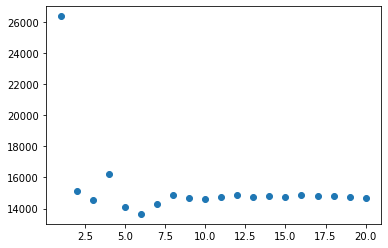

In [58]:
plt.scatter(hyper_params,mse_values)
plt.show()

In [59]:
hyper_params = [x for x in range(1,21)]
mse_values = list()

In [60]:
for i in hyper_params:
    knn = KNeighborsRegressor(
        n_neighbors=i,
        algorithm='brute'
    )
    knn.fit(train_df[['accommodates','bedrooms','bathrooms','number_of_reviews']],
            train_df['price']
           )
    predictions = knn.predict(test_df[['accommodates','bedrooms','bathrooms','number_of_reviews']])
    mse = mean_squared_error(predictions,test_df['price'])
    mse_values.append(mse)



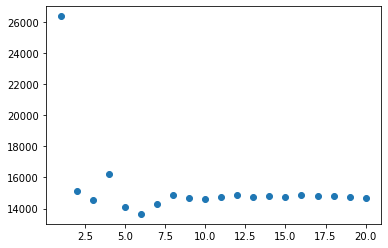

In [61]:
plt.scatter(hyper_params,mse_values)
plt.show()

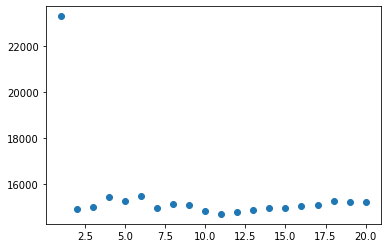

In [64]:
hyper_params = [x for x in range(1,21)]
mse_values = list()
features = train_df.columns.tolist()
features.remove('price')

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(predictions,test_df['price'])
    mse_values.append(mse)

plt.scatter(hyper_params, mse_values)
plt.show()

In [63]:
two_features = ['accommodates', 'bathrooms']
three_features = ['accommodates', 'bathrooms', 'bedrooms']
hyper_params = [x for x in range(1,21)]
# Append the first model's MSE values to this list.
two_mse_values = list()
# Append the second model's MSE values to this list.
three_mse_values = list()
two_hyp_mse = dict()
three_hyp_mse = dict()

In [73]:
for i in hyper_params:
    knn = KNeighborsRegressor(
        n_neighbors=i,algorithm='brute'
    )
    knn.fit(
        train_df[two_features],
        train_df['price']
    )
    predict = knn.predict(test_df[two_features])
    mse = mean_squared_error(predict,test_df['price'])
    two_mse_values.append(mse)
    two_hyp_mse[i] = mse

In [103]:
two_hyp_mse = {i:v for i, v in two_hyp_mse.items() if v == min(list(two_hyp_mse.values()))}


In [69]:
for i in hyper_params:
    knn = KNeighborsRegressor(
        n_neighbors=i,algorithm='brute'
    )
    knn.fit(
        train_df[three_features],
        train_df['price']
    )
    predict = knn.predict(test_df[three_features])
    mse = mean_squared_error(predict,test_df['price'])
    three_mse_values.append(mse)
    three_hyp_mse[i] = mse

In [108]:
three_hyp_mse = {i:v for i,v in three_hyp_mse.items() if v == min(list(three_hyp_mse.values()))}

---
# Cross Validation

In [109]:
import numpy as np
import pandas as pd

dc_listings = pd.read_csv("dc_airbnb.csv")
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

In [115]:
ind = np.random.permutation(dc_listings.index)

In [116]:
dc_listings = dc_listings.iloc[ind]


In [131]:
split_one = dc_listings[:1862].copy()
split_two = dc_listings[1862:].copy()

In [132]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

train_one = split_one
test_one = split_two
train_two = split_two
test_two = split_one

In [133]:
knn = KNeighborsRegressor(
    n_neighbors=5,
    algorithm='auto'
)

knn.fit(
    train_one[['accommodates']],
    train_one['price']
)

test_one['predicted_price'] = knn.predict(test_one[['accommodates']])
iteration_one_rmse = np.sqrt(mean_squared_error(test_one['price'],test_one['predicted_price']))

In [134]:
knn = KNeighborsRegressor(
    n_neighbors=5,
    algorithm='auto'
)

knn.fit(
    train_two[['accommodates']],
    train_two['price']
)

test_two['predicted_price'] = knn.predict(test_two[['accommodates']])
iteration_two_rmse = np.sqrt(mean_squared_error(test_two['price'],test_two['predicted_price']))


In [135]:
avg_rmse = np.mean([iteration_one_rmse,iteration_two_rmse])

---

##  k-fold cross-validation.

As you increase the number the folds, the number of observations in each fold decreases and the variance of the fold-by-fold errors increases. 


k equal to n (the number of observations in the data set) is known as leave-one-out cross validation, or LOOCV for short. Through lots of trial and error, data scientists have converged on 10 as the standard k value.

```
from sklearn.model_selection import cross_val_score, KFold

num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]

for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    model = KNeighborsRegressor()
    mses = cross_val_score(model, dc_listings[["accommodates"]], dc_listings["price"], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    print(str(fold), "folds: ", "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse))
```


In the following code block, we display the results of varying k from 3 to 23. For each k value, we calculate and display the average RMSE value across all of the folds and the standard deviation of the RMSE values. Across the many different k values, it seems like the average RMSE value is around 129. You'll notice that the standard deviation of the RMSE increases from approximately 8 to over 40 as we increase the number of folds.




In [138]:

dc_listings = pd.read_csv("dc_airbnb.csv")
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

In [149]:
dc_listings.loc[dc_listings.index[0:745], "fold"] = 1
dc_listings.loc[dc_listings.index[745:1490], "fold"] = 2
dc_listings.loc[dc_listings.index[1490:2234], "fold"] = 3
dc_listings.loc[dc_listings.index[2234:2978], "fold"] = 4
dc_listings.loc[dc_listings.index[2978:3723], "fold"] = 5

In [146]:
dc_listings['fold'].value_counts()

5    745
1    745
2    745
3    744
4    744
Name: fold, dtype: int64

In [148]:
dc_listings['fold'].isna().sum()

0

In [156]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(
    n_neighbors=5,
    algorithm='auto'
)


train_iteration_one = dc_listings[dc_listings['fold'].isin([2,3,4,5])]
test_iteration_one = dc_listings[dc_listings['fold'] == 1]

knn.fit(
    train_iteration_one[['accommodates']],
    train_iteration_one['price']
)

labels = knn.predict(
    test_iteration_one[['accommodates']]
)

iteration_one_rmse = np.sqrt(mean_squared_error(labels,test_iteration_one['price']))

iteration_one_rmse


123.64816897663778

In [163]:
import numpy as np
fold_ids = [1,2,3,4,5]

def train_and_validate(df,lst):
    rmse = []
    for i in lst:
        train = df[df['fold'] != i]
        test = df[df['fold'] == i]
        knn = KNeighborsRegressor(n_neighbors=5,algorithm='auto')
        knn.fit(train[['accommodates']],train['price'])
        predictions = knn.predict(test[['accommodates']])
        mse = mean_squared_error(predictions,test[['price']])
        rmse.append(np.sqrt(mse))
    return rmse
        

In [164]:
rmses = train_and_validate(dc_listings,fold_ids)
avg_rmse = np.mean(rmses)

---
# Scikit KFold
```
from sklearn.model_selection import KFold
kf = KFold(n_splits, shuffle=False, random_state=None)
```


* n_splits is the number of folds you want to use,
* shuffle is used to toggle shuffling of the ordering of the observations in the dataset,
* random_state is used to specify the random seed value if shuffle is set to True.



```
from sklearn.model_selection import cross_val_score
cross_val_score(estimator, X, Y, scoring=None, cv=None)
```


* estimator is a sklearn model that implements the fit method (e.g. instance of KNeighborsRegressor),
* X is the list or 2D array containing the features you want to train on,
* y is a list containing the values you want to predict (target column),
* scoring is a string describing the scoring criteria (list of accepted values here).
* cv describes the number of folds. Here are some examples of accepted values:
    * an instance of the KFold class,
    * an integer representing the number of folds.



In [172]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

kf = KFold(5,shuffle=True,random_state=1)
knn = KNeighborsRegressor(n_neighbors=5,algorithm='auto')
mses = cross_val_score(knn,dc_listings[['accommodates']],dc_listings['price'],scoring="neg_mean_squared_error", cv=kf)




In [173]:
avg_rmse = np.mean(np.sqrt(np.absolute(mses)))

# Bias and Variance


Bias describes error that results in bad assumptions about the learning algorithm. For example, assuming that only one feature, like a car's weight, relates to a car's fuel efficiency will lead you to fit a simple, univariate regression model that will result in high bias. The error rate will be high since a car's fuel efficiency is affected by many other factors besides just its weight.


Variance describes error that occurs because of the variability of a model's predicted values. If we were given a dataset with 1000 features on each car and used every single feature to train an incredibly complicated multivariate regression model, we will have low bias but high variance. In an ideal world, we want low bias and low variance but in reality, there's always a tradeoff.


The standard deviation of the RMSE values can be a proxy for a model's variance while the average RMSE is a proxy for a model's bias. Bias and variance are the 2 observable sources of error in a model that we can indirectly control.


<img src="img/bias_variance.png">

